In [99]:
import pandas as pd

# region_id, gene_id, enh_id, avg_dist
gm12878_neanderthal_df_ref = pd.read_parquet("./links/experiment_2/gm12878_neanderthal_df_ref.parquet")
hffc6_neanderthal_df_ref = pd.read_parquet("./links/experiment_2/hffc6_neanderthal_df_ref.parquet")

# region_id, gene_id, enh_id, avg_dist
gm12878_existing_links = pd.read_csv("./links/experiment_2/gm12878_existing_links.csv")
hffc6_existing_links = pd.read_csv("./links/experiment_2/hffc6_existing_links.csv")

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist
gm12878_hffc6_common_links = pd.read_csv("./links/experiment_2/gm12878_hffc6_common_links.csv")

# region_id, gene_id, enh_id, gm12878_avg_dist
gm12878_hffc6_gm12878_only_links = pd.read_csv("./links/experiment_2/gm12878_hffc6_gm12878_only_links.csv")

# region_id, gene_id, enh_id, hffc6_avg_dist
gm12878_hffc6_hffc6_only_links = pd.read_csv("./links/experiment_2/gm12878_hffc6_hffc6_only_links.csv")

In [28]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Nean"]]

gm12878_existing_links = gm12878_existing_links[gm12878_existing_links["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_existing_links = hffc6_existing_links[hffc6_existing_links["avg_dist"] > distance_cutoff["HFFC6_Nean"]]

gm12878_hffc6_common_links = gm12878_hffc6_common_links[gm12878_hffc6_common_links["gm12878_avg_dist"] > distance_cutoff["GM12878_Nean"]]

gm12878_hffc6_gm12878_only_links = gm12878_hffc6_gm12878_only_links[gm12878_hffc6_gm12878_only_links["gm12878_avg_dist"] > distance_cutoff["GM12878_Nean"]]

gm12878_hffc6_hffc6_only_links = gm12878_hffc6_hffc6_only_links[gm12878_hffc6_hffc6_only_links["hffc6_avg_dist"] > distance_cutoff["HFFC6_Nean"]]

In [29]:
gm12878_hffc6_common_links

,region_id,gene_id,enh_id,gm12878_avg_dist,hffc6_avg_dist
0,chr10:69686135-77506369,ENSG00000138303,chr10:72274062-72274152,4.901674,1.785752
1,chr11:2217319-4222558,ENSG00000181649,chr11:2902370-2902580,5.051189,5.244012
2,chr11:47305544-50688076,ENSG00000109919,chr11:47765368-47767068,16.630257,5.557111
3,chr10:69686135-77506369,ENSG00000214655,chr10:73810902-73811472,6.375730,6.561680
4,chr10:69686135-77506369,ENSG00000166321,chr10:73252272-73252462,6.275414,5.921783
...,...,...,...,...,...
3650,chr9:85927677-87940584,ENSG00000135070,chr9:86353235-86354265,14.337254,12.886045
3651,chr9:4312614-9443633,ENSG00000106688,chr9:4666250-4666430,13.424251,19.168032
3653,chr9:4312614-9443633,ENSG00000106993,chr9:4665270-4666210,4.632296,5.363499
3654,chr9:36129720-39499245,ENSG00000137106,chr9:37486803-37487853,3.709180,0.976119


In [30]:
gm12878_hffc6_gm12878_only_links_distance_in_hffc6 = (
     pd.merge(
        gm12878_hffc6_gm12878_only_links,
        hffc6_neanderthal_df_ref,
        on=["region_id", "gene_id", "enh_id"],
        how="left"
     )
     .dropna()
     .rename(columns={"avg_dist": "hffc6_avg_dist"})
)

gm12878_hffc6_gm12878_only_links_distance_in_hffc6

,region_id,gene_id,enh_id,gm12878_avg_dist,hffc6_avg_dist,enh_tSS_distance
6,chr10:69686135-77506369,ENSG00000107758,chr10:73810902-73811472,12.264132,8.191153,315163.0
14,chr10:132661554-133797422,ENSG00000151650,chr10:133275586-133276766,6.804036,11.775173,38322.0
39,chr10:69686135-77506369,ENSG00000166317,chr10:73773042-73773182,15.261718,14.924337,109309.0
64,chr10:69686135-77506369,ENSG00000107758,chr10:73773042-73773182,17.418922,16.110073,277088.0
115,chr10:97906407-99910128,ENSG00000119943,chr10:98445413-98446803,9.977614,10.520952,30926.0
...,...,...,...,...,...,...
9198,chr9:132231282-135611137,ENSG00000188523,chr9:132353753-132354913,8.913167,11.425274,55709.0
9201,chr9:32605979-35410564,ENSG00000258728,chr9:34637423-34637543,1.850834,3.447560,9147.0
9205,chr9:135770640-138394717,ENSG00000197768,chr9:137241418-137241718,5.207938,4.541871,9692.0
9207,chr9:132231282-135611137,ENSG00000186350,chr9:134407494-134408144,12.735401,16.730001,90722.0


In [31]:
gm12878_hffc6_hffc6_only_links_distance_in_gm12878 = (
    pd.merge(
        gm12878_hffc6_hffc6_only_links,
        gm12878_neanderthal_df_ref,
        on=["region_id", "gene_id", "enh_id"],
        how="left"
    )
    .dropna()
    .rename(columns={"avg_dist": "gm12878_avg_dist"})
)

gm12878_hffc6_hffc6_only_links_distance_in_gm12878

,region_id,gene_id,enh_id,hffc6_avg_dist,gm12878_avg_dist,enh_tSS_distance
16,chr11:63186244-65192942,ENSG00000110047,chr11:64242218-64242378,4.164910,1.885850,645998.0
67,chr11:63186244-65192942,ENSG00000168067,chr11:65047568-65047638,11.302544,3.598823,244362.0
73,chr11:63186244-65192942,ENSG00000176485,chr11:64206818-64207348,7.988035,6.995062,590200.0
76,chr11:54379674-57673729,ENSG00000149131,chr11:57530237-57530657,9.579576,9.297931,66939.0
84,chr11:63186244-65192942,ENSG00000149781,chr11:63986518-63988328,5.386694,4.771101,219254.0
...,...,...,...,...,...,...
15498,chr9:36129720-39499245,ENSG00000107371,chr9:37486803-37487853,8.087480,14.853462,344789.0
15499,chr9:36129720-39499245,ENSG00000070601,chr9:37784063-37784713,3.296872,14.735016,133435.0
15500,chr9:32605979-35410564,ENSG00000010438,chr9:34125282-34126352,7.879022,10.281122,375139.0
15509,chr9:36129720-39499245,ENSG00000137054,chr9:37784063-37784713,7.142539,9.805514,298441.0


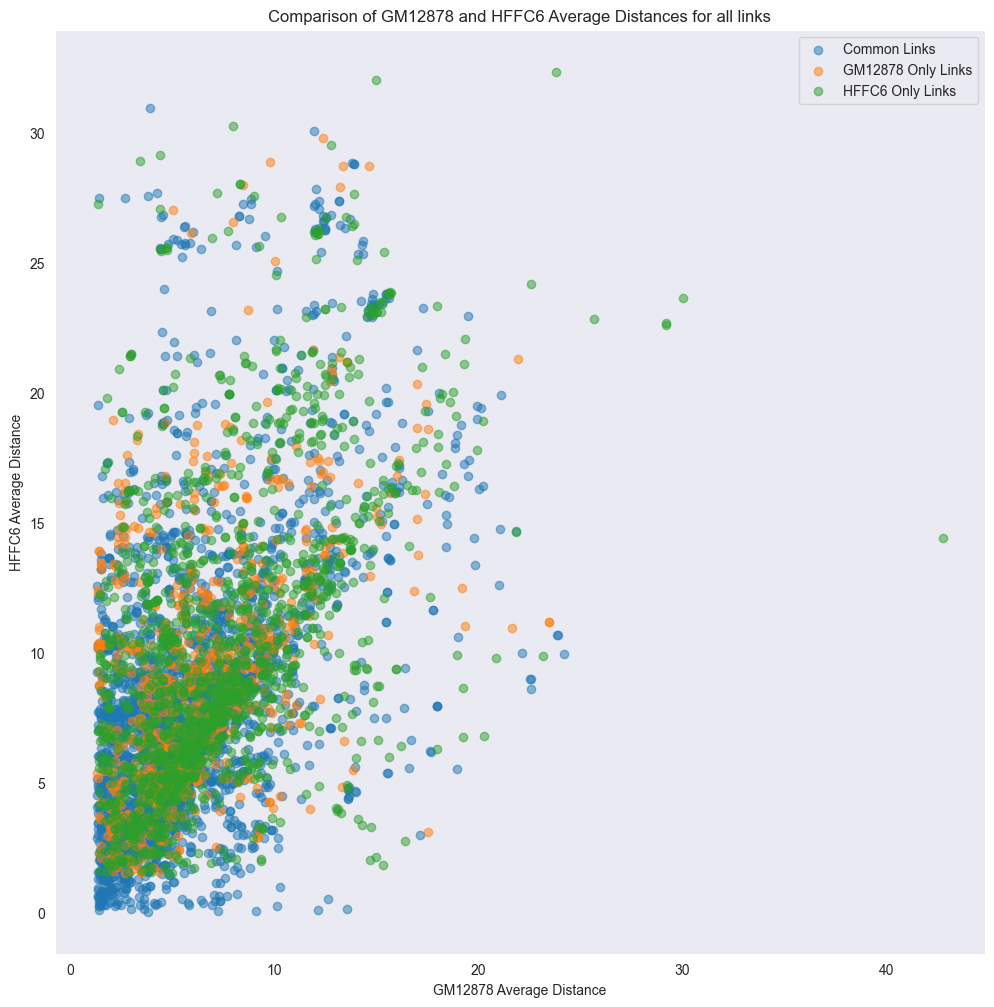

In [32]:
# Sort by distance, bar plot on top of each other gm12878_hffc6_common_links (region_id,gene_id,enh_id,gm12878_avg_dist,hffc6_avg_dist)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.scatter(gm12878_hffc6_common_links["gm12878_avg_dist"], gm12878_hffc6_common_links["hffc6_avg_dist"], label="Common Links", alpha=0.5)
plt.scatter(gm12878_hffc6_gm12878_only_links_distance_in_hffc6["gm12878_avg_dist"], gm12878_hffc6_gm12878_only_links_distance_in_hffc6["hffc6_avg_dist"], label="GM12878 Only Links", alpha=0.5)
plt.scatter(gm12878_hffc6_hffc6_only_links_distance_in_gm12878["gm12878_avg_dist"], gm12878_hffc6_hffc6_only_links_distance_in_gm12878["hffc6_avg_dist"], label="HFFC6 Only Links", alpha=0.5)
plt.xlabel("GM12878 Average Distance")
plt.ylabel("HFFC6 Average Distance")
plt.title("Comparison of GM12878 and HFFC6 Average Distances for all links")
plt.legend()
plt.grid()
plt.show()

In [33]:
gm12878_hffc6_gm12878_only_links.sort_values(by="gm12878_avg_dist", ascending=True, inplace=True)
gm12878_hffc6_gm12878_only_links

,region_id,gene_id,enh_id,gm12878_avg_dist
3907,chr19:13345145-18309700,ENSG00000105640,chr19:17488941-17489001,1.320796
1946,chr16:28118907-31001007,ENSG00000176953,chr16:28952209-28952899,1.322401
468,chr11:63186244-65192942,ENSG00000171219,chr11:64742938-64743998,1.322417
3450,chr17:2037482-6752705,ENSG00000177374,chr17:2042236-2042596,1.323094
8979,chr6:28173941-34087086,ENSG00000237649,chr6:33585363-33585583,1.326376
...,...,...,...,...
7716,chr21:42550113-44551553,ENSG00000241945,chr21:44353867-44354647,24.818884
7757,chr21:42550113-44551553,ENSG00000160221,chr21:44353867-44354647,24.974258
8515,chr5:174919132-179964898,ENSG00000175309,chr5:177875859-177876529,26.372576
8571,chr5:174919132-179964898,ENSG00000197451,chr5:177875859-177876529,26.387939


In [34]:
gm12878_hffc6_hffc6_only_links.sort_values(by="hffc6_avg_dist", ascending=True, inplace=True)
gm12878_hffc6_hffc6_only_links

,region_id,gene_id,enh_id,hffc6_avg_dist
9231,chr19:34349547-36373974,ENSG00000126267,chr19:35643048-35643218,1.498864
10171,chr1:108644134-111489899,ENSG00000065135,chr1:109090878-109092888,1.499496
11651,chr1:152071370-154072772,ENSG00000143570,chr1:153977004-153977164,1.500901
1315,chr11:8672302-10681352,ENSG00000175356,chr11:8810273-8810513,1.503031
9346,chr19:45115751-47125286,ENSG00000104892,chr19:45398152-45398262,1.503476
...,...,...,...,...
1905,chr10:69686135-77506369,ENSG00000156650,chr10:75211192-75211472,30.249041
2338,chr10:69686135-77506369,ENSG00000156650,chr10:75210942-75211132,30.249041
10886,chr1:116104-4081494,ENSG00000186891,chr1:1625190-1625280,30.451309
13373,chr3:123000966-126958665,ENSG00000163848,chr3:125108126-125110186,32.030991


In [35]:
gm12878_gene_to_closest_avg_enhancer_all = (
    gm12878_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

gm12878_gene_to_closest_avg_enhancer_all['has_link'] = gm12878_gene_to_closest_avg_enhancer_all.index_fields.isin(gm12878_existing_links["gene_id"].unique())

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = hffc6_gene_to_closest_avg_enhancer_all.index_fields.isin(hffc6_existing_links["gene_id"].unique())

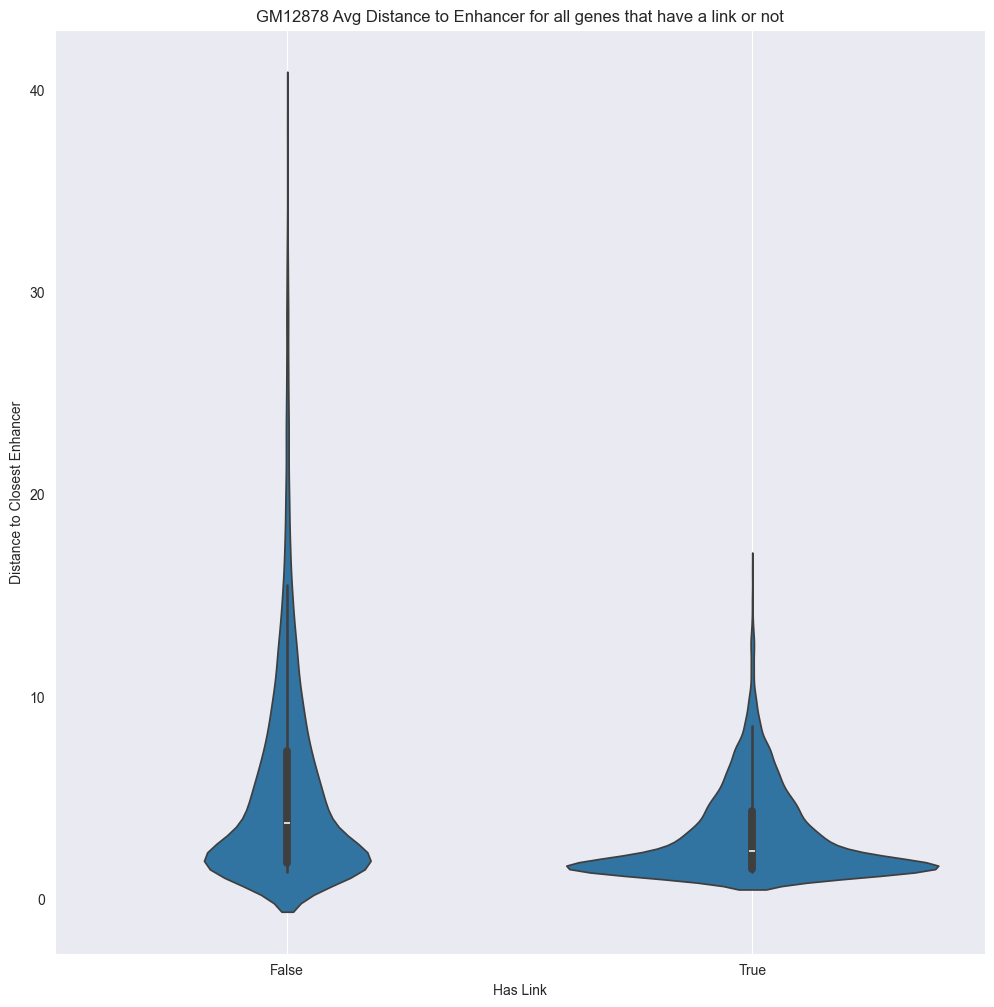

In [109]:
# Box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.violinplot(data=gm12878_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")
plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("GM12878 Avg Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

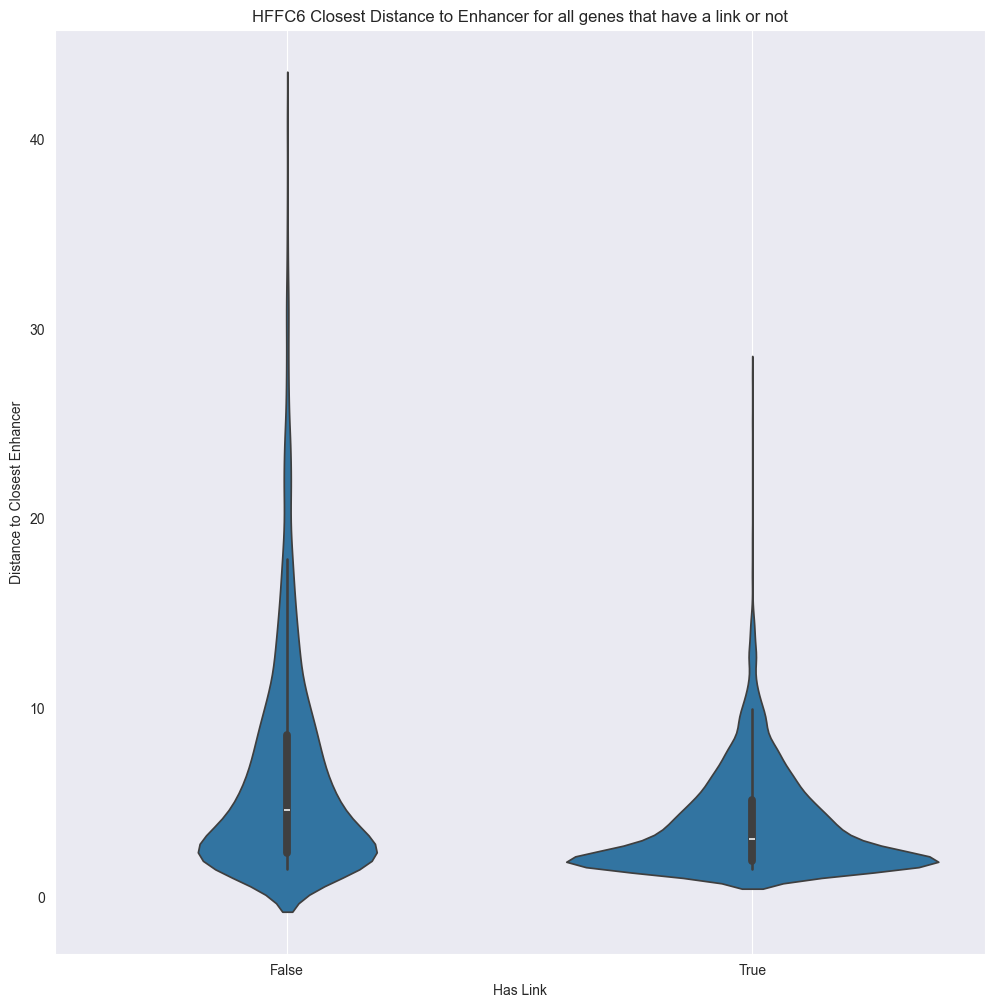

In [108]:
 # Box plot of the distance to the closest enhancer for all genes that have a link or not in HFFC6
plt.figure(figsize=(12, 12))
sns.violinplot(data=hffc6_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")
plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("HFFC6 Closest Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

In [100]:
gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]

In [101]:
gm12878_neanderthal_all_pairs_with_has_link = gm12878_neanderthal_df_ref.copy()
gm12878_neanderthal_all_pairs_with_has_link['has_link'] = (
    gm12878_neanderthal_all_pairs_with_has_link['gene_id'].isin(gm12878_existing_links['gene_id'])
    & gm12878_neanderthal_all_pairs_with_has_link['enh_id'].isin(gm12878_existing_links['enh_id'])
)

hffc6_neanderthal_all_pairs_with_has_link = hffc6_neanderthal_df_ref.copy()
hffc6_neanderthal_all_pairs_with_has_link['has_link'] = (
    hffc6_neanderthal_all_pairs_with_has_link['gene_id'].isin(hffc6_existing_links['gene_id'])
    & hffc6_neanderthal_all_pairs_with_has_link['enh_id'].isin(hffc6_existing_links['enh_id'])
)

all_pairs_joined = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        hffc6_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_hffc6"),
        how="inner"
    )
)

# select gm12878 to have link, and hffc6 to not have link
all_pairs_joined_gm12878_yes_link_hffc6_no_link = all_pairs_joined[
    (all_pairs_joined["has_link_gm12878"] == True) &
    (all_pairs_joined["has_link_hffc6"] == False)
]

# select hffc6 to have link, and gm12878 to not have link
all_pairs_joined_hffc6_yes_link_gm12878_no_link = all_pairs_joined[
    (all_pairs_joined["has_link_hffc6"] == True) &
    (all_pairs_joined["has_link_gm12878"] == False)
]

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, hffc6)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_hffc6_no_link = (
    all_pairs_joined_gm12878_yes_link_hffc6_no_link
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_hffc6_yes_link_gm12878_no_link = (
    all_pairs_joined_hffc6_yes_link_gm12878_no_link
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_gm12878_yes_link_hffc6_no_link

,type,gene_id,avg_dist,min_dist,max_dist
0,gm12878,ENSG00000000938,4.966906,4.083075,8.611968
1,gm12878,ENSG00000002016,7.039501,7.039501,7.039501
2,gm12878,ENSG00000002822,6.927194,6.927194,6.927194
3,gm12878,ENSG00000004660,6.149492,5.627038,6.671946
4,gm12878,ENSG00000005844,4.445994,0.874021,11.578426
...,...,...,...,...,...
1051,hffc6,ENSG00000259371,6.649736,4.987020,9.062057
1052,hffc6,ENSG00000259784,3.466964,0.018885,5.922982
1053,hffc6,ENSG00000261793,7.546824,2.301732,10.234273
1054,hffc6,ENSG00000261832,14.377644,13.977146,14.778142


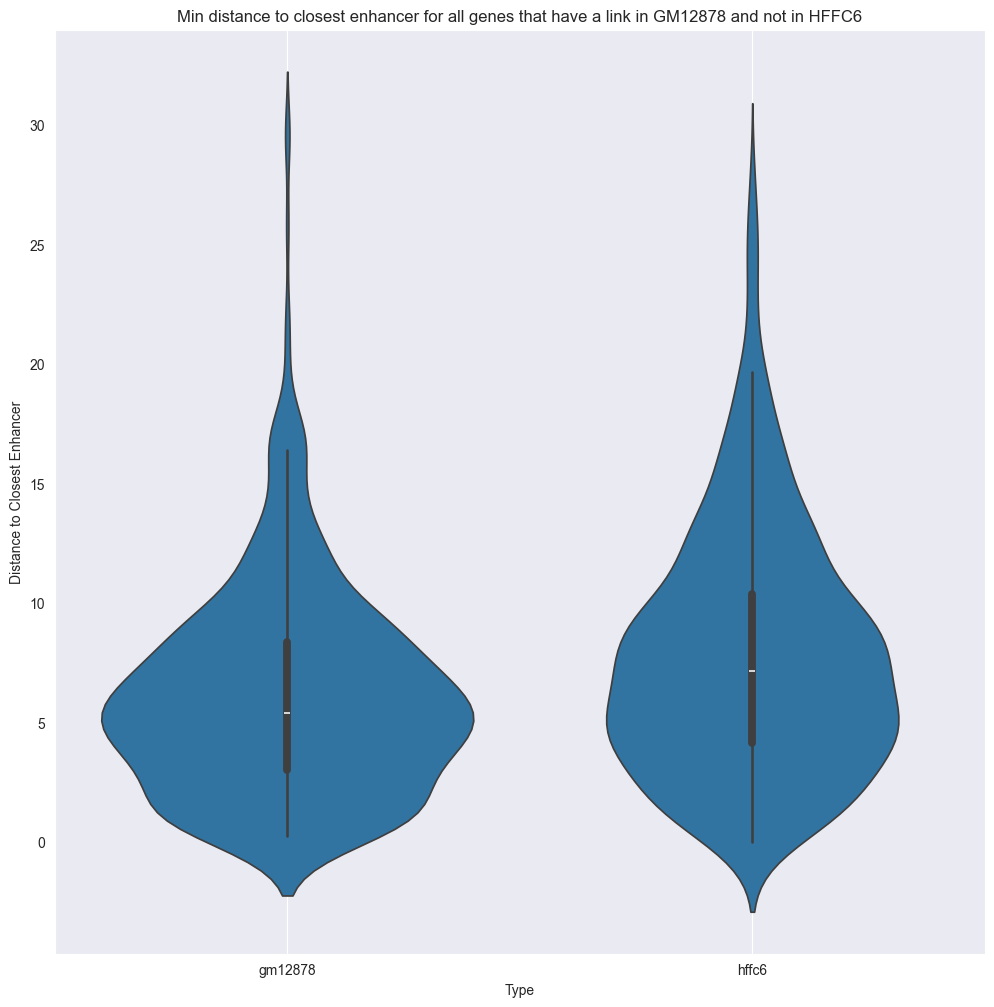

In [102]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_hffc6_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in GM12878 and not in HFFC6")
plt.grid()
plt.show()

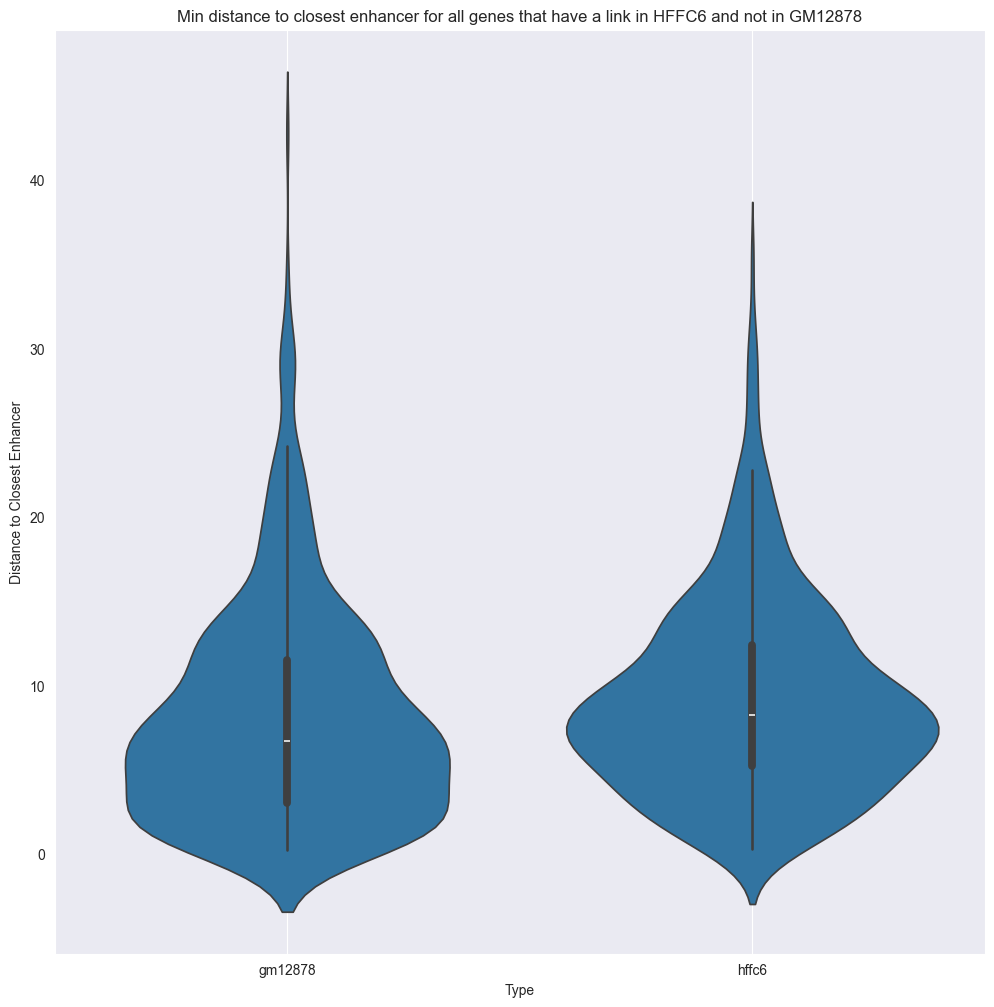

In [103]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_gm12878_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in HFFC6 and not in GM12878")
plt.grid()
plt.show()